In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv("../../../Bigdata Files/Advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [68]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [69]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [70]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [71]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [72]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [74]:
df.duplicated().sum()

0

In [75]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [76]:
X=df.drop("Sales",axis=1).values

In [77]:
X.shape

(200, 3)

In [78]:
y=df["Sales"].values

In [79]:
y.shape

(200,)

In [80]:
# TV vs Sales

<Axes: >

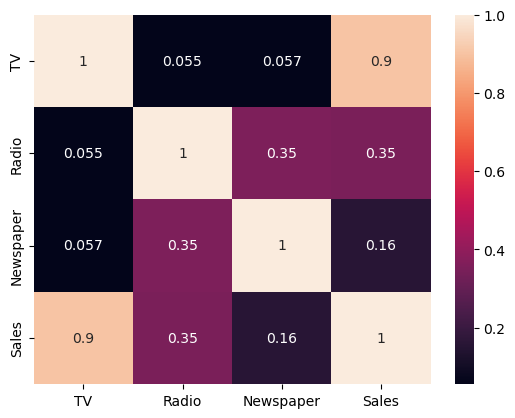

In [107]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'TV vs Sales')

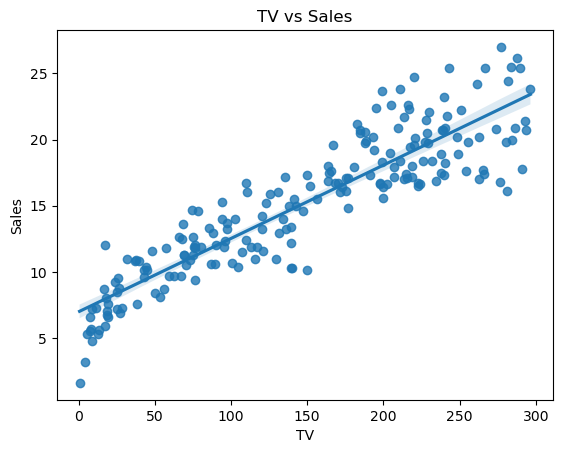

In [81]:
sns.regplot(x=df.TV,y=df.Sales)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")

Text(0.5, 1.0, 'Radio vs Sales')

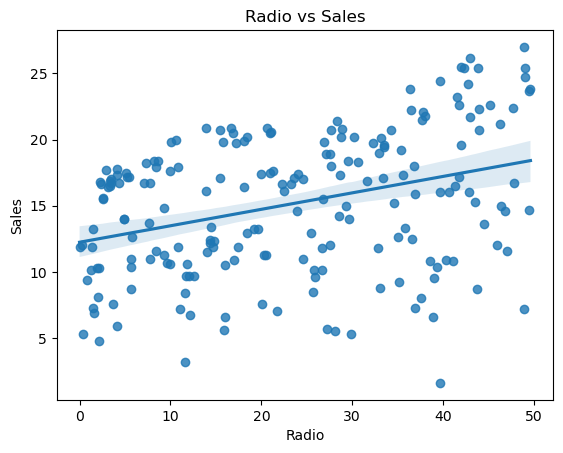

In [82]:
sns.regplot(x=df.Radio,y=df.Sales)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio vs Sales")

Text(0.5, 1.0, 'Newspaper vs Sales')

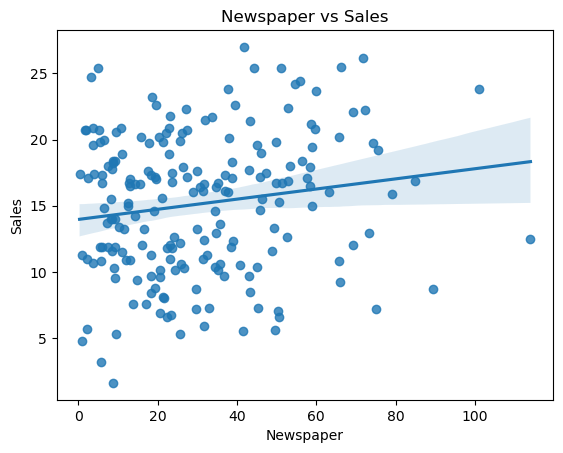

In [83]:
sns.regplot(x=df.Newspaper,y=df.Sales)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")

###### alternative 

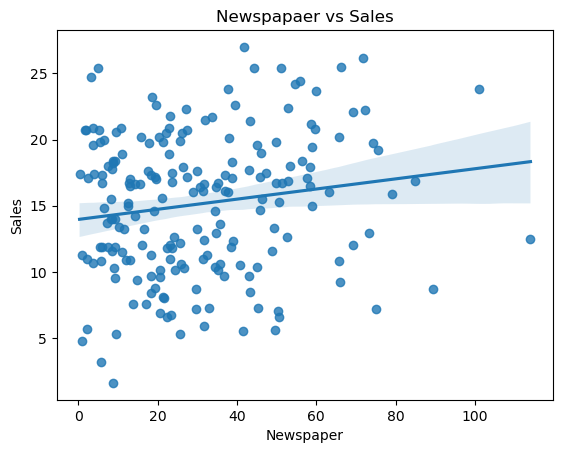

In [84]:
sns.regplot(x=df.Newspaper,y=df.Sales).set(xlabel='Newspaper', ylabel='Sales', title='Newspapaer vs Sales');

In [85]:
# from these regression plot TV effecting more on Sales data

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [90]:
df_error=pd.DataFrame({"Actual_val":y_test,"Predicted_val":y_pred,"Error":y_test-y_pred})
df_error

,Actual_val,Predicted_val,Error
0,16.9,17.159919,-0.259919
1,22.4,20.533695,1.866305
2,21.4,23.689144,-2.289144
3,7.3,9.519146,-2.219146
4,24.7,21.607368,3.092632
5,12.6,12.781013,-0.181013
6,22.3,21.086363,1.213637
7,8.4,8.760542,-0.360542
8,16.5,17.115000,-0.615000
9,16.1,16.687896,-0.587896


In [92]:
X_train.shape,y_train.shape

((140, 3), (140,))

In [95]:
print("Intercept is :",model.intercept_)
print("Solpe is :",model.coef_)

Intercept is : 4.743766701589687
Solpe is : [0.05358869 0.10270677 0.00793167]


In [97]:
list(zip(X,model.coef_))

[(array([230.1,  37.8,  69.2]), 0.05358869132706914),
 (array([44.5, 39.3, 45.1]), 0.10270676778771287),
 (array([17.2, 45.9, 69.3]), 0.007931667677316312)]

In [98]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [99]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.1594875061090588


In [100]:
print("MAPE",mean_absolute_percentage_error(y_test,y_pred))

MAPE 0.10536440823029314


In [101]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 2.54162403622915


In [102]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1.5942471691143598


#### r2_score

In [108]:
from sklearn.metrics import r2_score

In [109]:
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9091484341849798


In [110]:
# 90 % accurate